In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import MaxNLocator
from sklearn.model_selection import train_test_split

In [2]:
coin = "dogecoin"

In [3]:
df = pd.read_csv(f'{coin}_dataset.csv')

In [4]:
df.columns

Index(['date', 'positive', 'negative', 'neutral', 'sentiment', 'price'], dtype='object')

In [5]:
len(df)

546

Experiment 1: Linear Regression from sentiment as 3-element tuple and change in price

In [6]:
days = 7

In [7]:
prices = df["price"]
x = []
y = []

In [8]:
pad = [prices[0]]*days
pad.extend(prices)

In [9]:

for i in range(0,len(df)-days):
    prices = pad[i:i+days]
    prices.append(df["sentiment"].iloc[i])
    x.append(prices)
    predict_prices = pad[i+days: i + (2*days)]
    y.append(predict_prices)

In [10]:
y[:5]

[[0.0020399999999999997,
  0.001999,
  0.002042,
  0.002307,
  0.0020800000000000003,
  0.002153,
  0.002182],
 [0.001999,
  0.002042,
  0.002307,
  0.0020800000000000003,
  0.002153,
  0.002182,
  0.0021379999999999997],
 [0.002042,
  0.002307,
  0.0020800000000000003,
  0.002153,
  0.002182,
  0.0021379999999999997,
  0.0021379999999999997],
 [0.002307,
  0.0020800000000000003,
  0.002153,
  0.002182,
  0.0021379999999999997,
  0.0021379999999999997,
  0.002208],
 [0.0020800000000000003,
  0.002153,
  0.002182,
  0.0021379999999999997,
  0.0021379999999999997,
  0.002208,
  0.002179]]

In [11]:
len(x),len(y)

(539, 539)

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
y.shape

(539, 7)

In [14]:
len(df)

546

In [15]:
diff_order = 1

In [16]:
# x = x[diff_order:]
# y = np.diff(y, n = diff_order)

In [17]:
# len(x), len(y)

In [18]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=42)

In [19]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, Lasso

In [20]:
clf = MultiOutputRegressor(Ridge(random_state=123)).fit(train_x, train_y)
print(clf.score(test_x, test_y))

0.9057068258120905


In [21]:
from random import randint

date         2020-01-29
positive       0.351797
negative      0.0835587
neutral        0.564644
sentiment      0.475057
price          0.002417
Name: 28, dtype: object


Text(0.5, 0, 'Time')

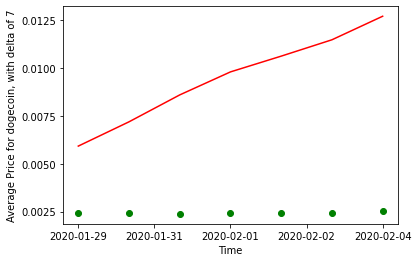

In [22]:
num = randint(0, len(x)-1)
prediction = clf.predict(x[num].reshape(1, -1))
y_pred, y_true, x_row = prediction[0], y[num], list(df["date"][num:num+days])
print(df.iloc[num])
# print(y_pred, y_true, x_row)
fig,axes=plt.subplots(1,1)
axes.scatter(x_row, y_true,color='g')
axes.plot(x_row,y_pred,color='r')
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.yaxis.set_major_locator(MaxNLocator(5)) 
plt.ylabel(f"Average Price for {coin}, with delta of {days}")
plt.xlabel("Time")


In [23]:
original_y = [sum(i)/len(i) for i in y]

In [24]:
prediction = clf.predict(x)

In [25]:
predicted_y = [sum(i)/len(i) for i in prediction]

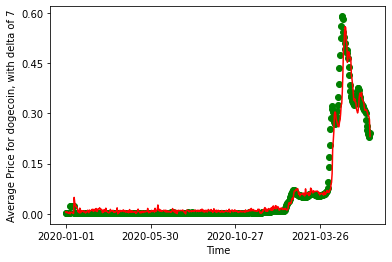

In [26]:
# print(len(x),len(regr.predict(x)))
fig,axes=plt.subplots(1,1)
axes.scatter(df["date"][:-days], original_y,color='g')
axes.plot(df["date"][:-days],predicted_y,color='r')
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.yaxis.set_major_locator(MaxNLocator(5)) 
plt.ylabel(f"Average Price for {coin}, with delta of {days}")
plt.xlabel("Time")

plt.show()

In [27]:
x = [(i,j,k) for i,j,k in zip(df["positive"], df["neutral"], df["negative"])]
x = np.array(x)
y = np.array(df["price"])

In [28]:
new_x, new_y, dates = [], [], []
days = 30
for i in range(0,len(x)-days):
    new_x.append(sum(x[i:i+days])/days)
    new_y.append(sum(y[i:i+days])/days)
    dates.append(df["date"].iloc[i])

In [29]:
x, y = new_x, new_y

In [30]:
x = x[diff_order:]
y = np.diff(y, n = diff_order)

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [32]:
regr = LinearRegression()
regr.fit(x, y)
# clf = MultiOutputRegressor(Ridge(random_state=123)).fit(x, y)
# print(clf.score(x, y))

LinearRegression()

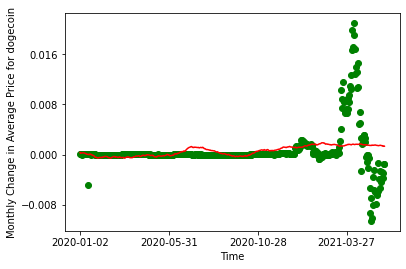

In [33]:
# print(len(x),len(regr.predict(x)))
fig,axes=plt.subplots(1,1)
axes.scatter(dates[diff_order:], y,color='g')
axes.plot(dates[diff_order:],regr.predict(x),color='r')
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.yaxis.set_major_locator(MaxNLocator(5)) 
plt.ylabel(f"Monthly Change in Average Price for {coin}")
plt.xlabel("Time")

plt.show()